# 💊 DRUGS A, B, C, X, Y

Construção de um modelo para descobrir qual medicamento pode ser apropriado para um futuro paciente com determinada doença.

Features: Age, Sex, Blood Pressure, Cholesterol.

Target: the drug - Drug A, Drug B, Drug C, Drug X, Drug Y.


Referência: https://www.kaggle.com/datasets/pablomgomez21/drugs-a-b-c-x-y-for-decision-trees

In [54]:
import pandas as pd

## Data Analysis

In [55]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [56]:
drugs_df = pd.read_csv('/content/drive/MyDrive/Hands-On Machine Learning with Scikit-Learn & TensorFlow/drug200.csv')
display(drugs_df)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [57]:
drugs_df.dtypes

,0
Age,int64
Sex,object
BP,object
Cholesterol,object
Na_to_K,float64
Drug,object


In [58]:
drugs_df.Drug.value_counts()

,count
Drug,
drugY,91
drugX,54
drugA,23
drugC,16
drugB,16


In [59]:
drugs_df.BP.unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [60]:
drugs_df.Cholesterol.unique()

array(['HIGH', 'NORMAL'], dtype=object)

## Model

*Build a model to find out which drug might be appropriate for a future patient with the same illness.*

In [61]:
# BP e Cholesterol : Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder
y = drugs_df.Drug
features = ['BP','Cholesterol', 'Na_to_K']
X = drugs_df[features]
ordinal_encoder = OrdinalEncoder(categories=[['LOW', 'NORMAL', 'HIGH'],['NORMAL', 'HIGH']])
X[['BP', 'Cholesterol']] = ordinal_encoder.fit_transform(X[['BP', 'Cholesterol']])
X.describe()

<ipython-input-61-073dff3c0017>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['BP', 'Cholesterol']] = ordinal_encoder.fit_transform(X[['BP', 'Cholesterol']])


,BP,Cholesterol,Na_to_K
count,200.000000,200.000000,200.000000
mean,1.065000,0.515000,16.084485
std,0.839224,0.501029,7.223956
min,0.000000,0.000000,6.269000
25%,0.000000,0.000000,10.445500
50%,1.000000,1.000000,13.936500
75%,2.000000,1.000000,19.380000
max,2.000000,1.000000,38.247000


In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
model = DecisionTreeClassifier(random_state = 1)
model.fit(train_X, train_y)


DecisionTreeClassifier(random_state=1)

In [69]:
from sklearn.metrics import accuracy_score
val_predictions = model.predict(val_X)
print(accuracy_score(val_y, val_predictions))

0.92


## Gráfico

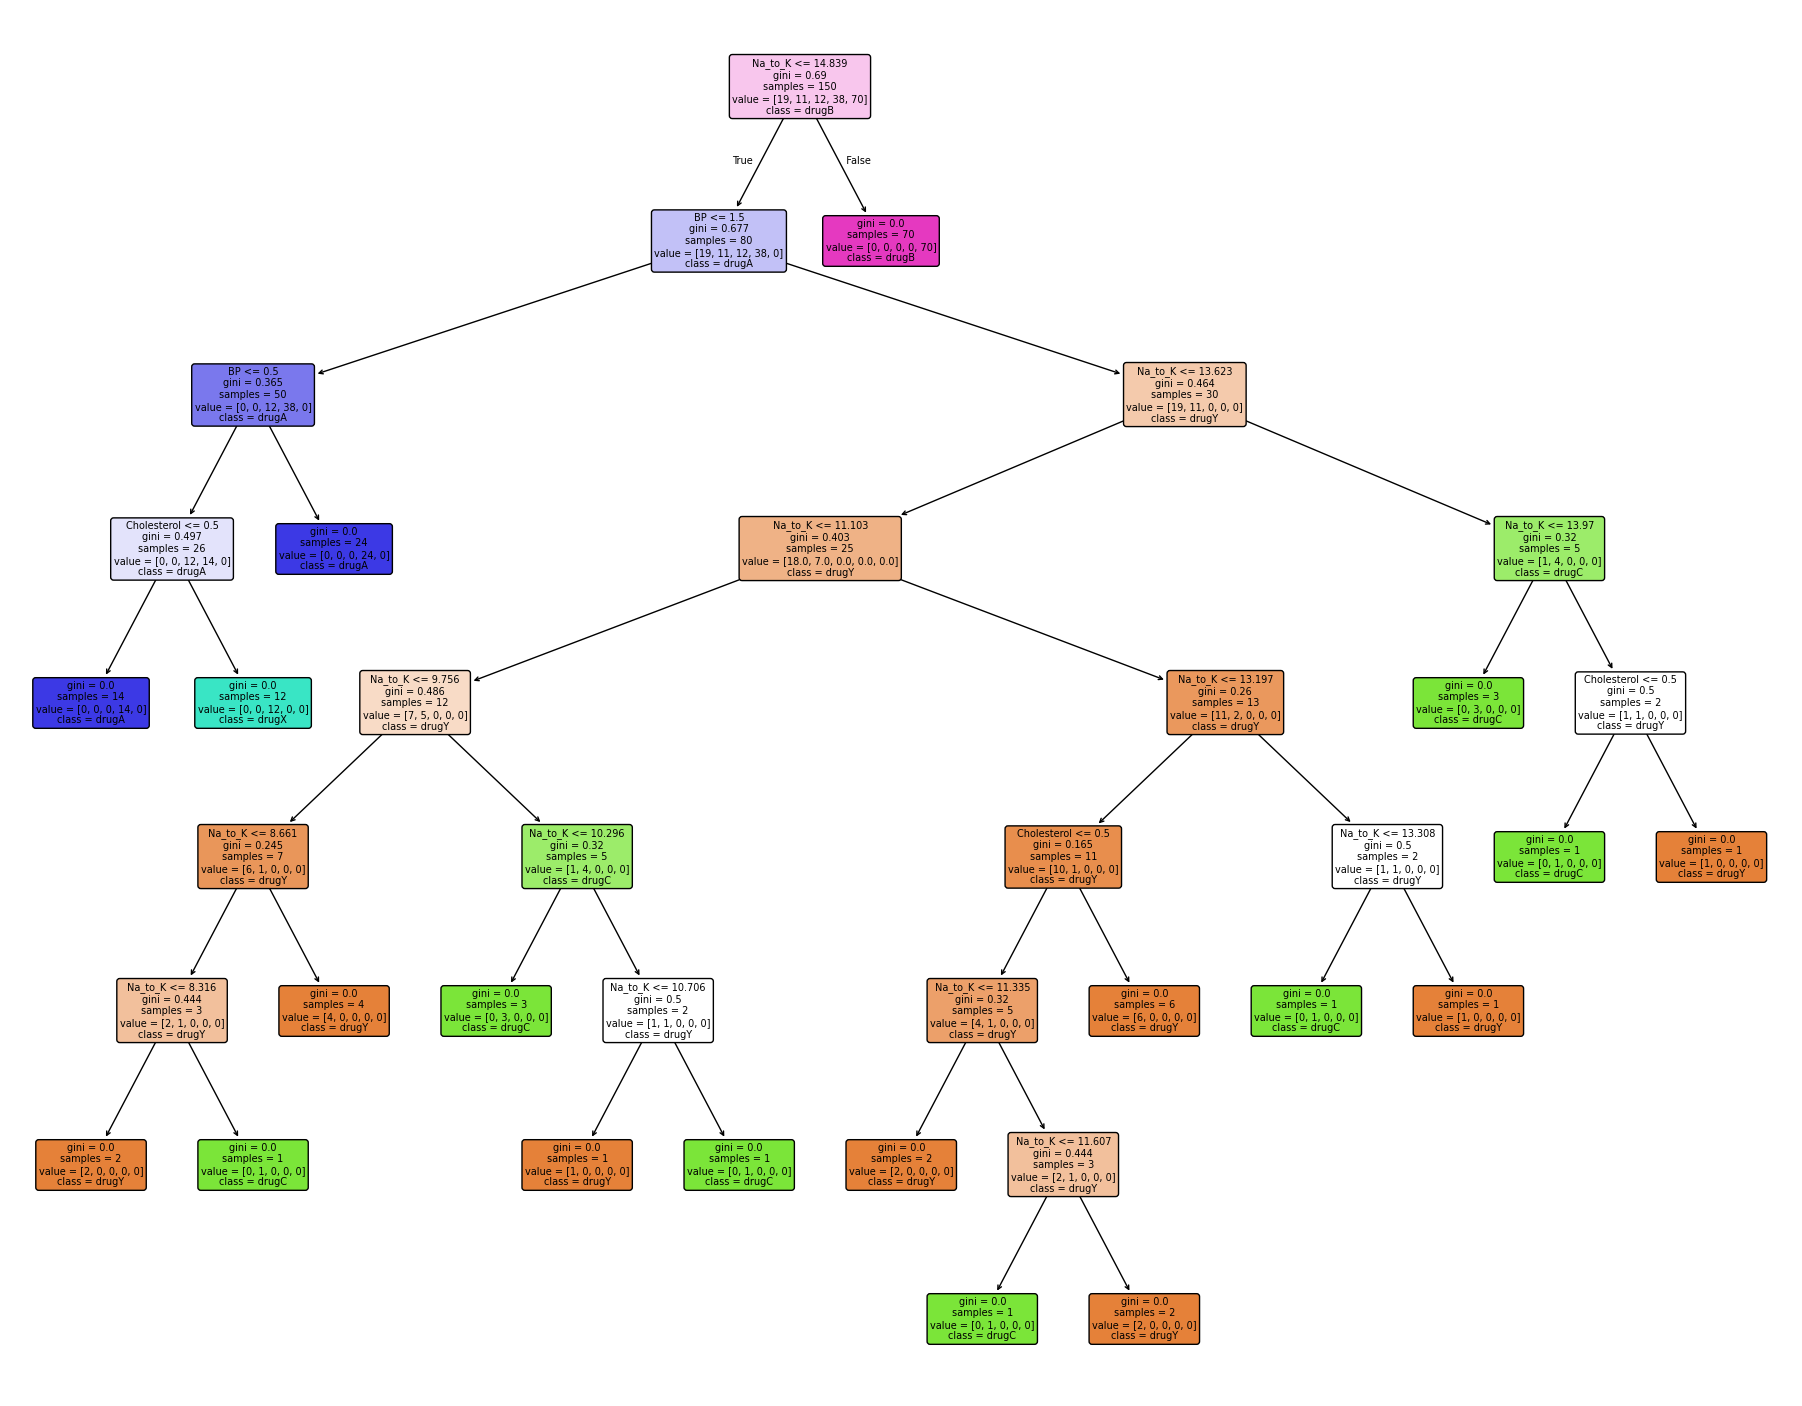

In [74]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(23, 18))
plot_tree(model, filled=True, feature_names = features, class_names = y.unique(), rounded=True)
plt.show()